In [2]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [3]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


# Checking out the data first and doing some cleaning.

In [4]:
df = dfLE 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
isDeveloped,191.0,1.675393e-01,3.744381e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Lifeexpectancy,183.0,6.922493e+01,9.186432e+00,46.11250,6.247500e+01,7.248750e+01,7.510625e+01,8.253750e+01
AdultMortality,183.0,1.647964e+02,9.618516e+01,18.75000,8.040625e+01,1.465625e+02,2.195938e+02,5.500625e+02
infantdeaths,191.0,2.913384e+01,1.136916e+02,0.00000,0.000000e+00,2.625000e+00,2.106250e+01,1.366688e+03
Alcohol,189.0,4.486793e+00,3.873123e+00,0.01000,1.000000e+00,3.582667e+00,7.466000e+00,1.349733e+01
HepatitisB,182.0,7.928771e+01,1.741770e+01,9.00000,6.815000e+01,8.337607e+01,9.468750e+01,9.900000e+01
Measles,191.0,2.326166e+03,7.924050e+03,0.00000,4.781250e+00,1.389375e+02,1.501594e+03,6.585794e+04
BMI,187.0,3.911715e+01,1.717553e+01,5.20000,2.088750e+01,4.384375e+01,5.227500e+01,8.730000e+01
under-fivedeaths,191.0,4.041263e+01,1.543107e+02,0.00000,0.000000e+00,3.250000e+00,2.528125e+01,1.812500e+03
Polio,191.0,8.283286e+01,1.592533e+01,29.81250,7.200000e+01,8.818750e+01,9.606250e+01,9.900000e+01


From here I can see there are quite a few columns with missing data. Population has quite a few data missing from several countries. Which could be problematic.
Next I will be displaying the rows with NaN values. Since each country can either be Developed or Developing status, I'll split them into two groups to get a better understanding of the missing data.

In [5]:
df1 = df[df.isna().any(axis=1)] 
df1Deved = df1[df1['isDeveloped'] == 1]
df1Deving = df1[df1['isDeveloped'] == 0]

df1Deved #Countries with Developed status

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
43,Czechia,1.0,76.76875,71.8125,0.0000,13.026000,97.285714,22.9375,55.71250,0.0000,98.0000,98.1250,0.000000e+00,NaN,NaN
47,Denmark,1.0,79.25625,66.0625,0.0000,10.708000,NaN,15.7500,55.82500,0.0000,88.0000,88.0000,1.293716e+11,4.260081e+06,17.19375
74,Hungary,1.0,73.82500,147.0625,0.5625,11.427333,NaN,2.0625,56.93125,0.8750,98.9375,99.0000,1.287278e+10,1.604902e+06,15.11875
75,Iceland,1.0,82.44375,49.3750,0.0000,7.466000,NaN,0.0000,51.07500,0.0000,89.7500,89.7500,6.230830e+09,1.861776e+05,18.15625
84,Japan,1.0,82.53750,57.1250,2.8750,7.040667,NaN,6875.8125,25.60625,4.0000,96.0000,96.2500,2.543555e+09,9.738406e+04,14.97500
119,NewZealand,1.0,81.33750,71.5000,0.0000,9.166250,70.187500,94.9375,56.62500,0.0000,89.1250,70.6250,0.000000e+00,NaN,18.86875
124,Norway,1.0,81.79375,66.2500,0.0000,6.234375,NaN,6.3125,50.81250,0.0000,93.0625,87.9375,6.975715e+10,2.614432e+06,17.46875
152,Singapore,1.0,81.47500,62.0000,0.0000,1.762500,95.875000,85.7500,25.90625,0.0000,96.1250,96.1875,0.000000e+00,NaN,13.98125
153,Slovakia,1.0,74.75000,118.0625,0.0000,10.473333,98.562500,0.2500,51.81875,0.1250,98.4375,98.6250,0.000000e+00,NaN,14.35000
154,Slovenia,1.0,79.73125,76.4375,0.0000,10.754667,NaN,6.0625,52.20000,0.0000,95.1875,95.0000,2.480334e+09,4.012791e+05,16.47500


In [6]:
df1Deving #Countries with Developing Status

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375
10,Bahamas,0.0,74.28750,152.0625,0.0000,10.271333,83.600000,0.0000,52.88125,0.0000,95.0000,95.7500,0.000000e+00,NaN,12.42500
11,Bahrain,0.0,75.72500,65.3750,0.0000,1.934667,98.125000,6.6875,51.65625,0.0000,98.0000,98.0625,0.000000e+00,NaN,14.11250
13,Barbados,0.0,74.35625,77.6250,0.0000,8.206667,84.066667,0.0000,45.97500,0.0000,80.3125,89.9375,0.000000e+00,NaN,14.89375
19,Bolivia(PlurinationalStateof),0.0,67.70625,177.5000,10.7500,3.212000,82.875000,7.6250,44.81875,14.0000,81.6875,87.3750,0.000000e+00,NaN,13.96250
23,BruneiDarussalam,0.0,76.48750,67.0625,0.0000,0.378667,97.875000,7.3125,29.71875,0.0000,97.5000,96.8125,0.000000e+00,NaN,14.10625
37,Congo,0.0,59.04375,322.7500,7.8750,2.173333,50.777778,1021.6250,20.92500,11.6875,52.4375,55.2500,0.000000e+00,NaN,10.08750
38,CookIslands,0.0,NaN,NaN,0.0000,0.010000,98.000000,0.0000,82.80000,0.0000,98.0000,98.0000,0.000000e+00,NaN,NaN
41,Cuba,0.0,77.97500,57.5625,1.0000,4.190667,96.250000,0.0000,49.46250,1.0000,98.6875,93.9375,0.000000e+00,NaN,14.69375
44,Côted'Ivoire,0.0,50.38750,417.3125,61.5000,2.837333,63.933333,1708.2500,21.32500,86.8125,65.9375,68.9375,0.000000e+00,NaN,NaN


Seems like a majority of countries that have missing population data come from developing countries. I can only assume that maybe there were some challenges when gathering data for population. 
Either way this does pose a problem since a significant portion of poppulation data, I might just end up dumping the whole column.


Other than the population column, some countries also seem to lack a lot of data on other columns such as Cook Island, Dominica and a few others so I will be omitting them in the next section. 

In [7]:
df = df.drop(df.index[[38, 49, 109, 116, 123, 127, 141, 145]]) # New dataframe with the following coutries removed.
df = df.fillna(0) #filling in NaN values with zeroes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 190
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           183 non-null    object 
 1   isDeveloped       183 non-null    float64
 2   Lifeexpectancy    183 non-null    float64
 3   AdultMortality    183 non-null    float64
 4   infantdeaths      183 non-null    float64
 5   Alcohol           183 non-null    float64
 6   HepatitisB        183 non-null    float64
 7   Measles           183 non-null    float64
 8   BMI               183 non-null    float64
 9   under-fivedeaths  183 non-null    float64
 10  Polio             183 non-null    float64
 11  Diphtheria        183 non-null    float64
 12  GDP               183 non-null    float64
 13  Population        183 non-null    float64
 14  Schooling         183 non-null    float64
dtypes: float64(14), object(1)
memory usage: 22.9+ KB


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [8]:
#Part 1
df['GDP per Capita'] = df['GDP'] / df['Population']
# filling NaN with zeroes 
df = df.fillna(0)
df.sample(10)

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP per Capita
153,Slovakia,1.0,74.75000,118.0625,0.0000,10.473333,98.562500,0.2500,51.81875,0.1250,98.4375,98.6250,0.000000e+00,0.000000e+00,14.35000,0.000000
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.3750,92.3750,1.641579e+11,2.012120e+07,16.50625,8158.454561
41,Cuba,0.0,77.97500,57.5625,1.0000,4.190667,96.250000,0.0000,49.46250,1.0000,98.6875,93.9375,0.000000e+00,0.000000e+00,14.69375,0.000000
89,Kuwait,0.0,73.84375,83.2500,0.5000,0.021333,98.187500,15.3750,59.60625,1.0000,98.1875,98.5000,0.000000e+00,0.000000e+00,13.72500,0.000000
180,UnitedKingdomofGreatBritainandNorthernIreland,1.0,80.79375,70.3750,3.6250,11.131250,0.000000,715.7500,55.38750,4.0625,92.8750,92.8750,0.000000e+00,0.000000e+00,0.00000,0.000000
187,VietNam,0.0,74.77500,126.5625,29.1875,3.087333,87.538462,4232.9375,11.18750,36.5000,94.9375,91.7500,0.000000e+00,0.000000e+00,11.51250,0.000000
74,Hungary,1.0,73.82500,147.0625,0.5625,11.427333,0.000000,2.0625,56.93125,0.8750,98.9375,99.0000,1.287278e+10,1.604902e+06,15.11875,8020.910601
84,Japan,1.0,82.53750,57.1250,2.8750,7.040667,0.000000,6875.8125,25.60625,4.0000,96.0000,96.2500,2.543555e+09,9.738406e+04,14.97500,26118.797585
119,NewZealand,1.0,81.33750,71.5000,0.0000,9.166250,70.187500,94.9375,56.62500,0.0000,89.1250,70.6250,0.000000e+00,0.000000e+00,18.86875,0.000000
45,DemocraticPeople'sRepublicofKorea,0.0,69.19375,160.8125,9.9375,3.000000,88.846154,222.5625,25.62500,12.8125,98.2500,83.2500,0.000000e+00,0.000000e+00,0.00000,0.000000


With so much population data missing, GDP per Capita will also have a lot of missing values. Which means it isn't much use to me, so I will not be using for the rest of the assignment.

### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

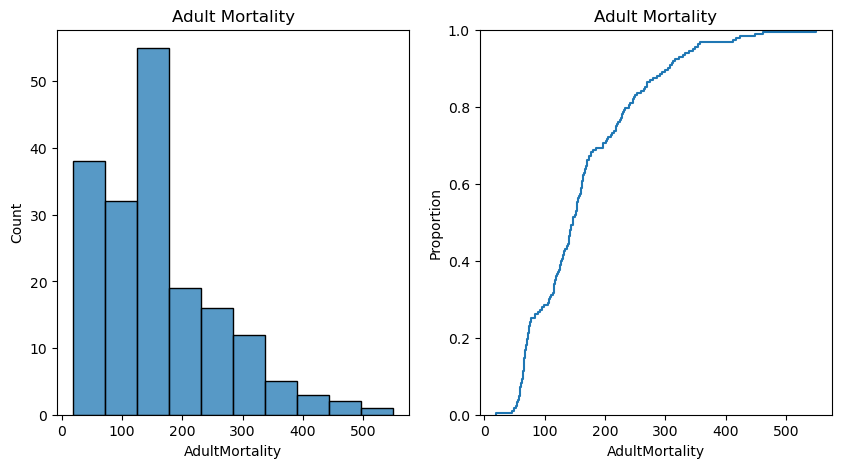

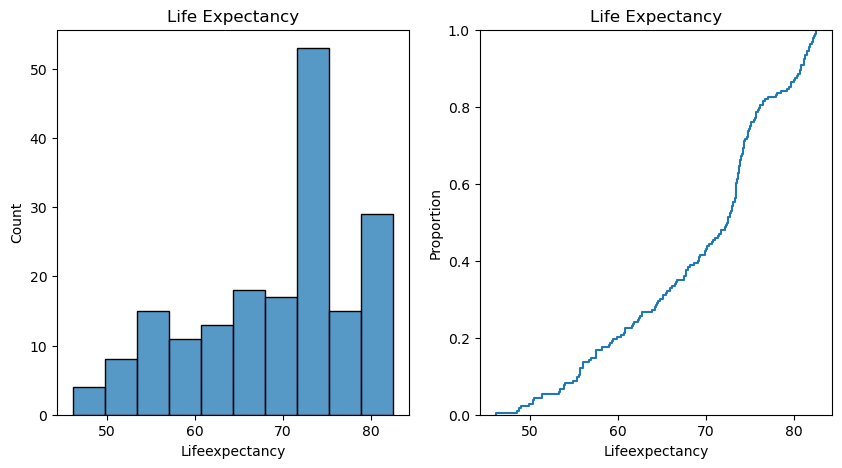

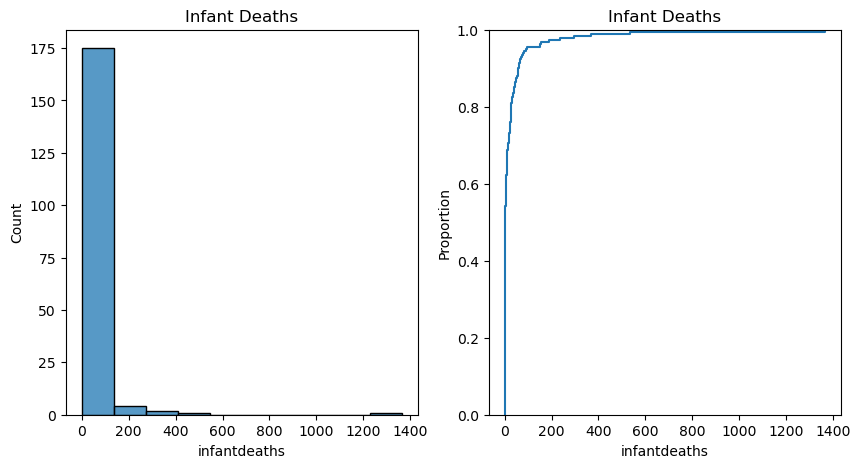

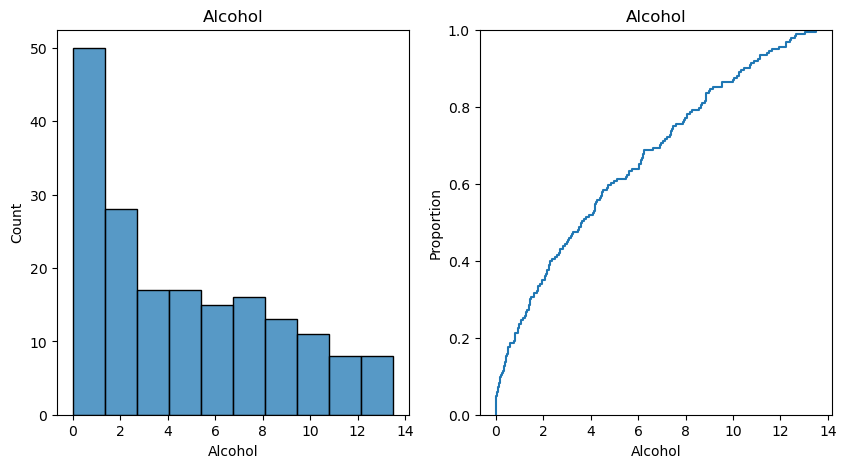

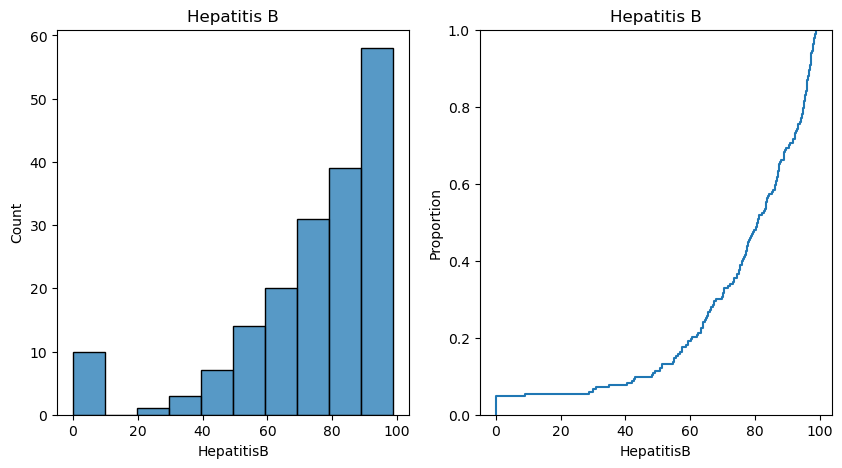

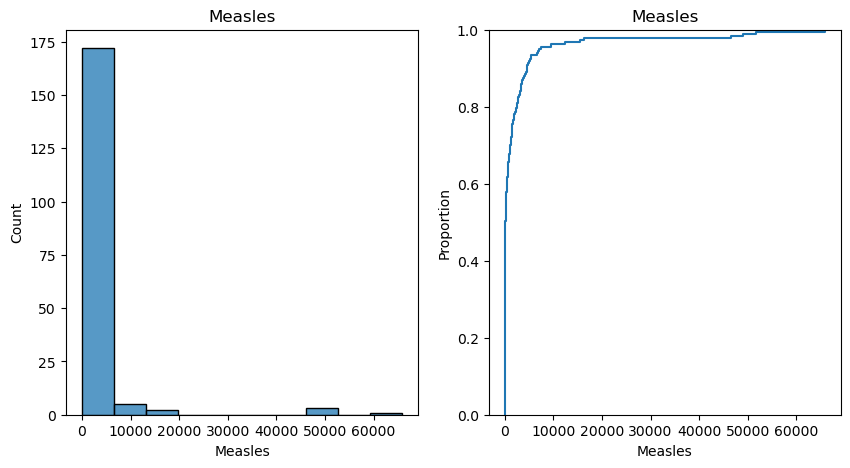

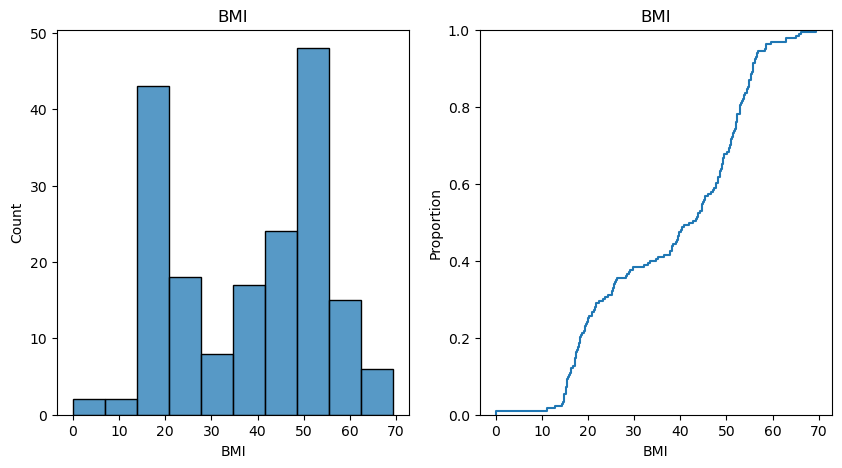

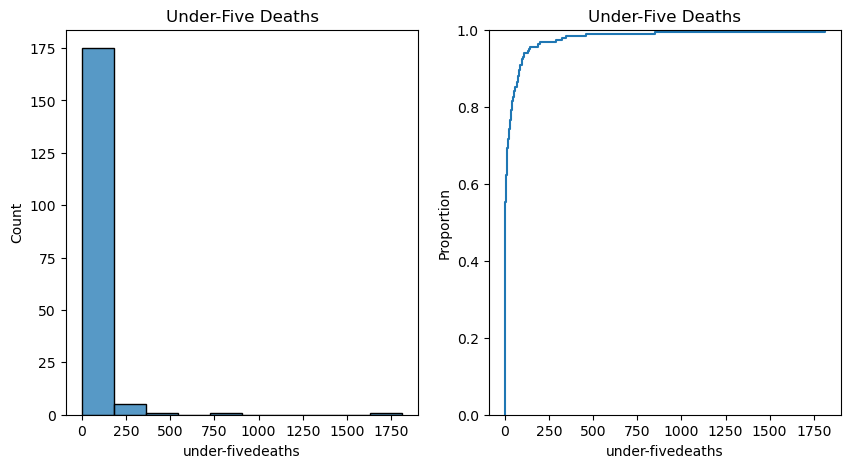

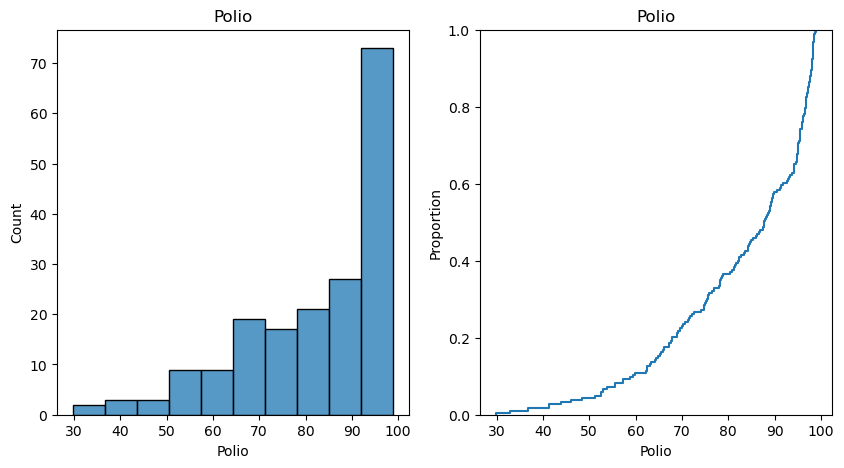

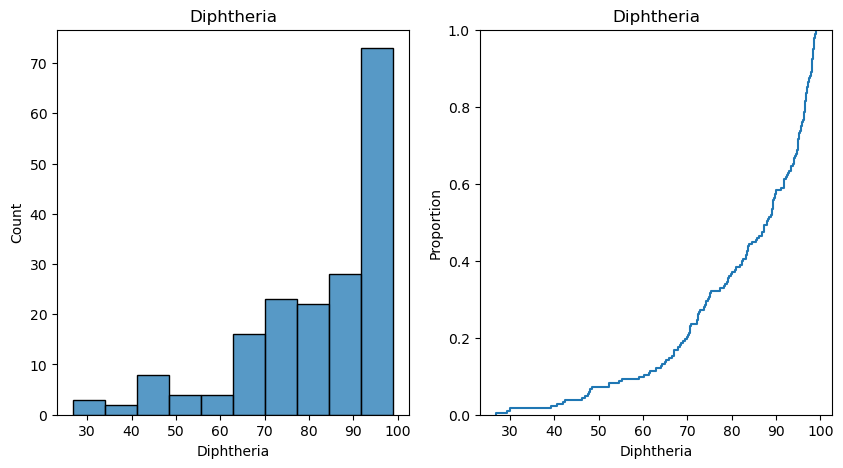

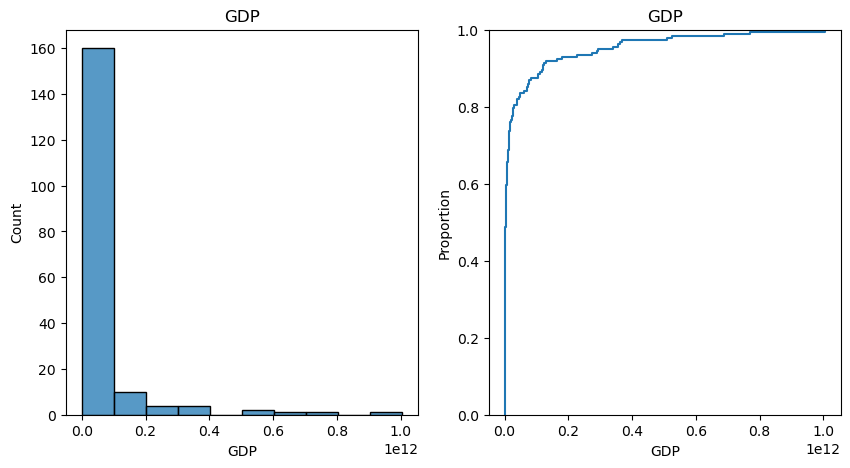

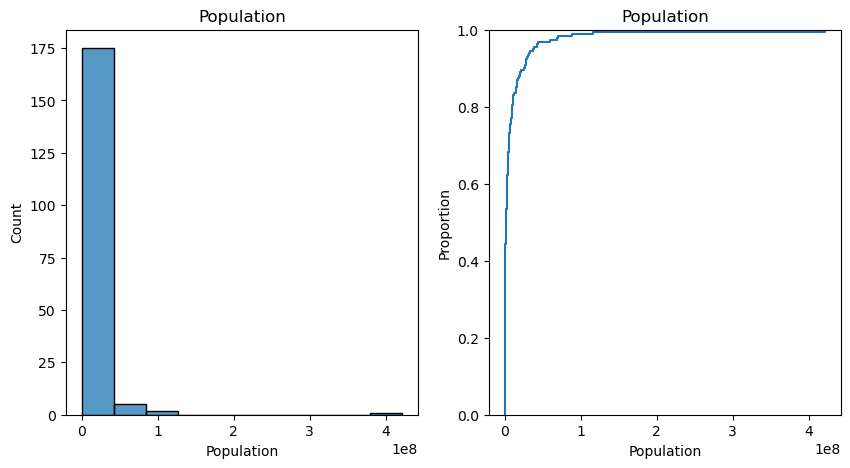

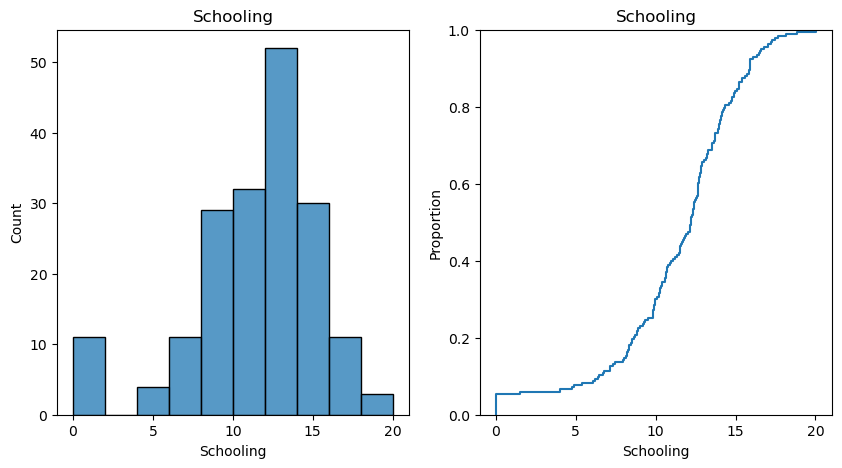

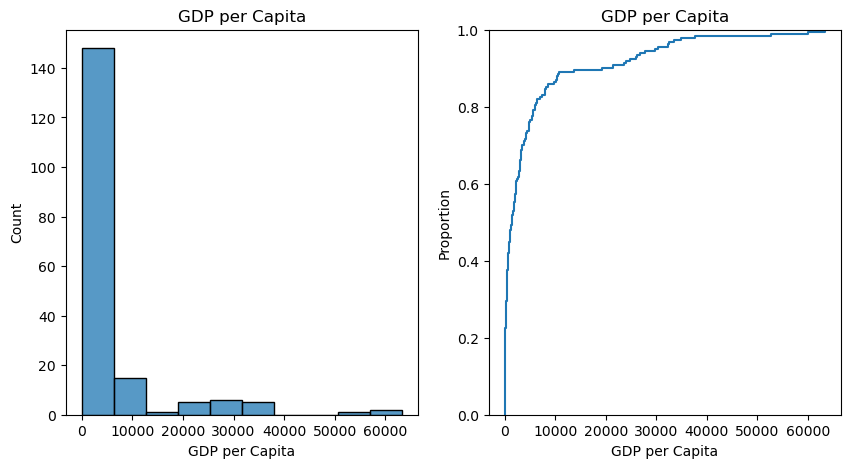

In [30]:
#Print all distributions
#GDP per Capita dropped don't bother using.
from dis import dis


def distribution(col_name, col_title = '', bin = 10, dat_in = df):
    fig, ax = plt.subplots(1, 2,figsize=(10,5))
    sns.histplot(dat_in[col_name],bins=bin, ax=ax[0]).set(title=col_title)
    sns.ecdfplot(data=dat_in, x=col_name, ax=ax[1]).set(title=col_title)
 

distribution('AdultMortality', 'Adult Mortality')
distribution('Lifeexpectancy', 'Life Expectancy')
distribution('infantdeaths', 'Infant Deaths')
distribution('Alcohol', 'Alcohol')
distribution('HepatitisB', 'Hepatitis B')
distribution('Measles', 'Measles')
distribution('BMI', 'BMI')
distribution('under-fivedeaths', 'Under-Five Deaths')
distribution('Polio', 'Polio')
distribution('Diphtheria', 'Diphtheria')
distribution('GDP', 'GDP')
distribution('Population', 'Population')
distribution('Schooling', 'Schooling')
distribution('GDP per Capita', 'GDP per Capita')


### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

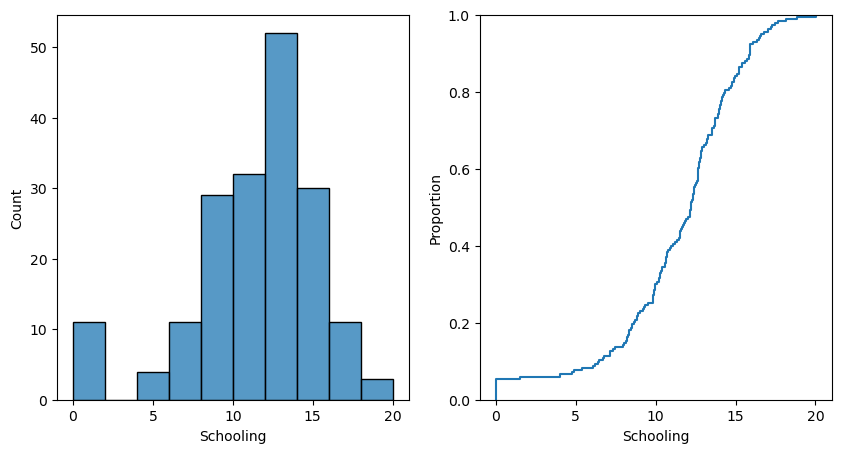

In [31]:
#Analytical for Schooling

distribution('Schooling')


### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

In [12]:
#Analytical for GDP/capita
#GDP per Capita dropped don't bother using.

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

In [13]:
#Visualize correlations. 

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [14]:
#Calculate correlations and analyze. 